In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Variant 2: mushrooms classification 

Task: binary classification

Models to use: any classification models (I'll try Gradient Boosting classifier)

Metrics: f-score with maximizing recall for poisonous mushrooms

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')

EDA

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

We need to encode categorical columns. Let's use LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split

le = LabelEncoder()
le.fit(df['class'])
df['class'] = le.transform(df['class'])
X = df.drop(['class'],axis=1)
y = df['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
def encoder(X_train, X_val):
    le = LabelEncoder()
    cols = X_train.columns
    for col in cols:
        le.fit(X_train[col])
        X_train[col] = le.transform(X_train[col])
        X_val[col] = le.transform(X_val[col])
    return X_train, X_val

In [ ]:
X_train, X_val = encoder(X_train, X_val)

In [ ]:
plt.style.use('seaborn')

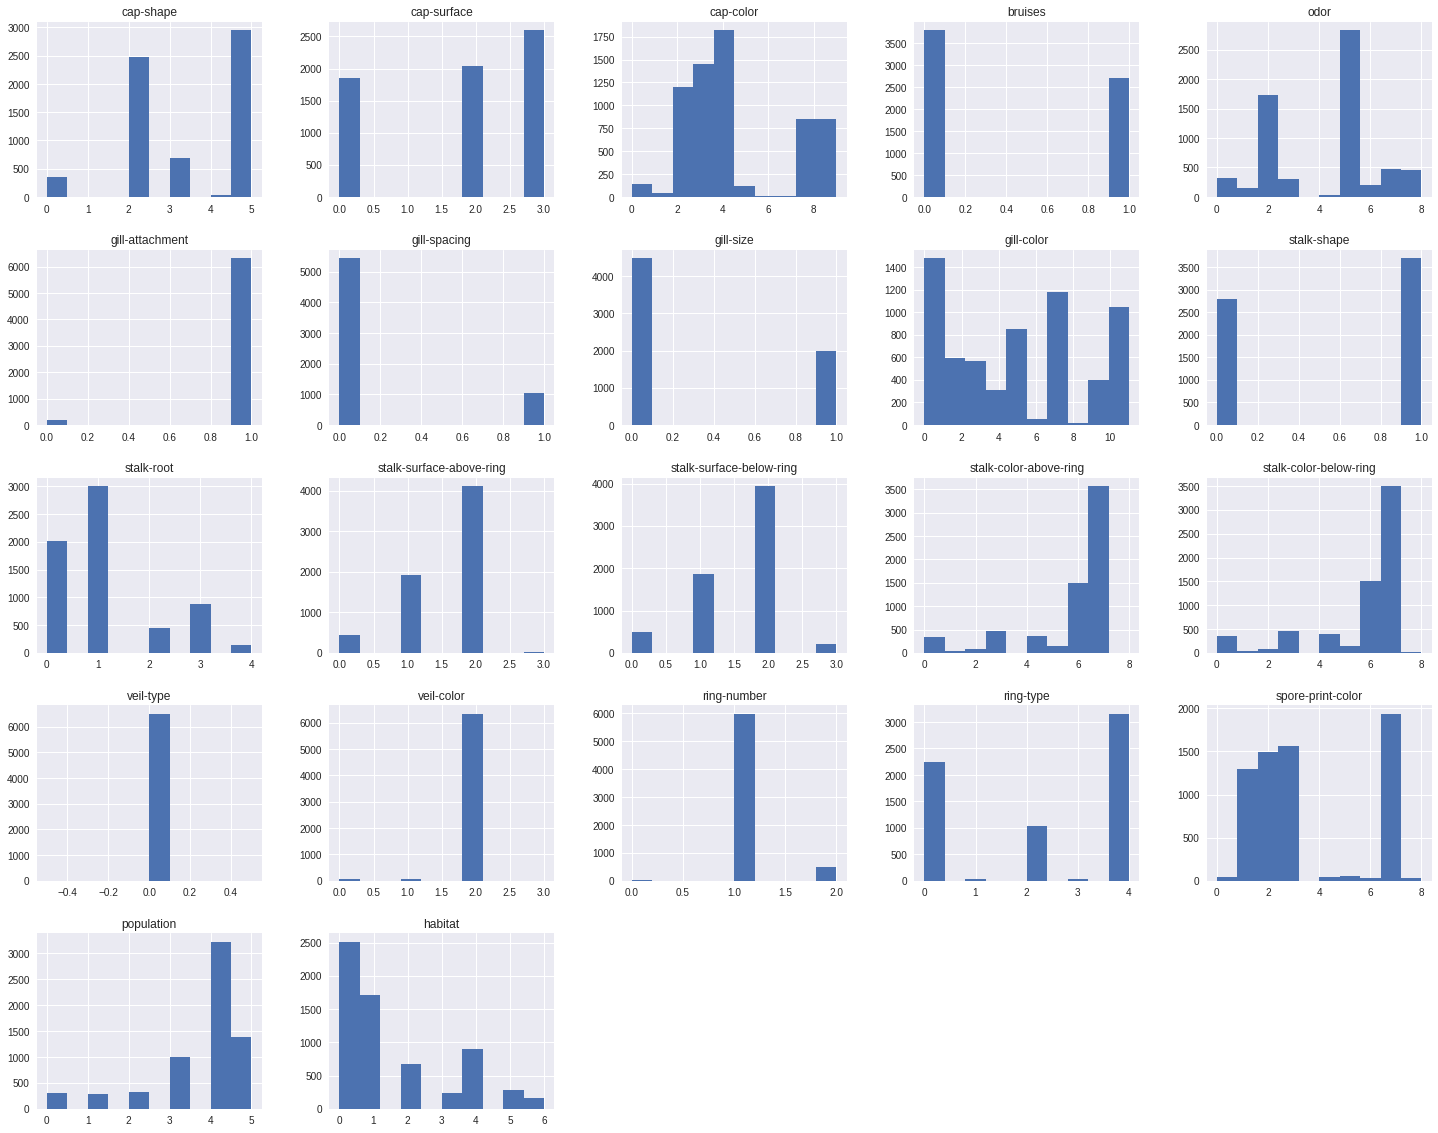

In [ ]:
fig = plt.figure(figsize = (25, 20))
ax = fig.gca()
X_train.hist(ax = ax);

Plotting histograms with class and other columns

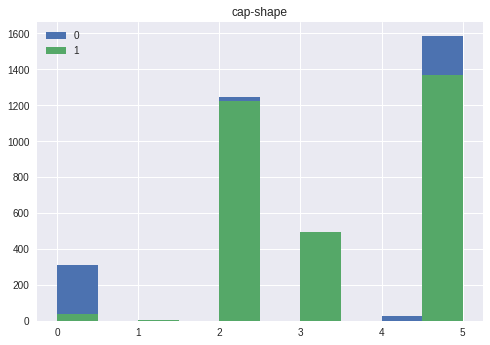

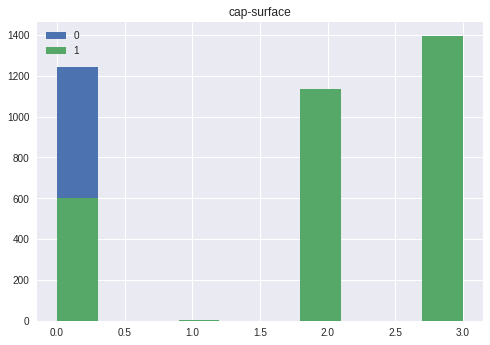

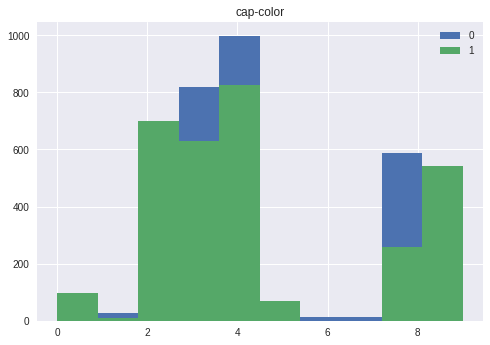

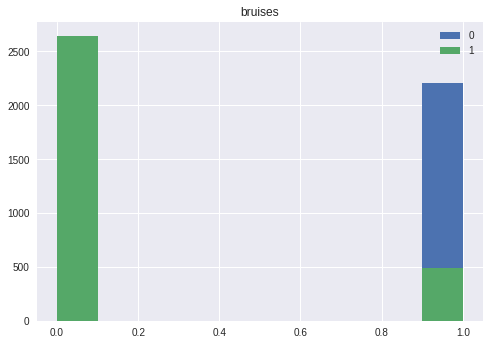

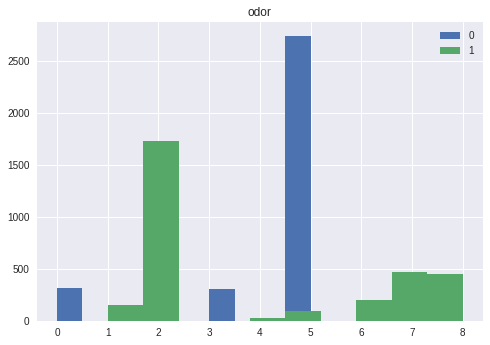

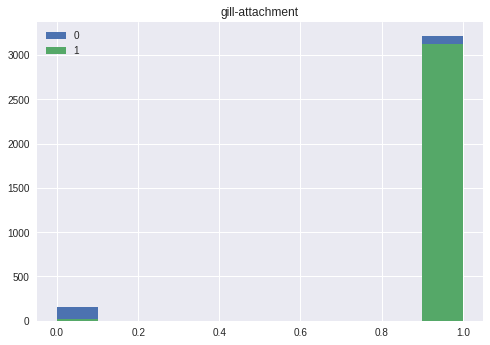

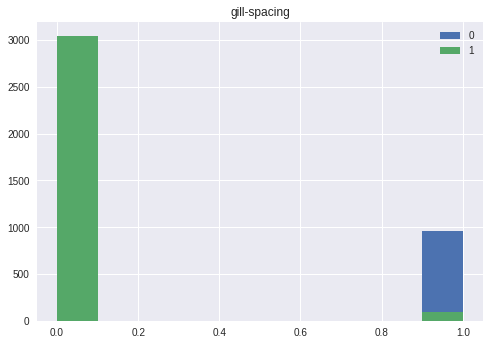

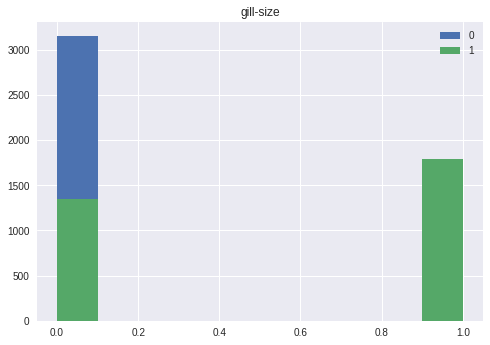

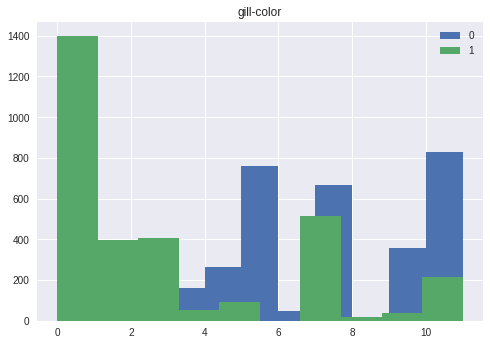

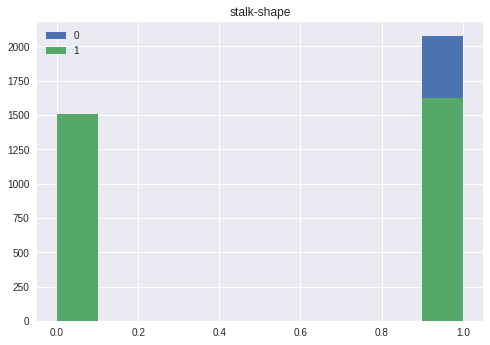

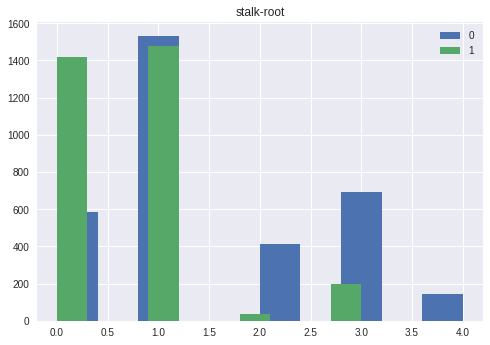

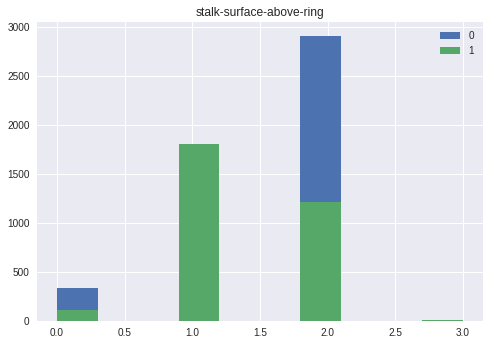

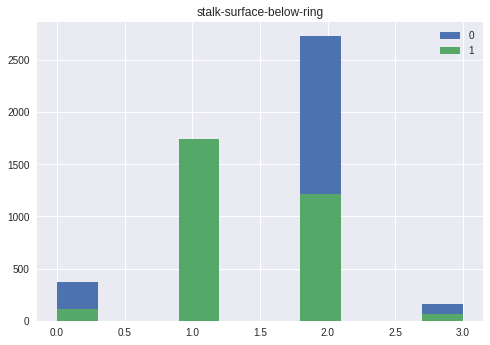

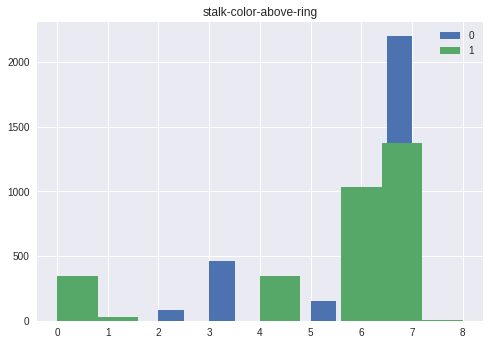

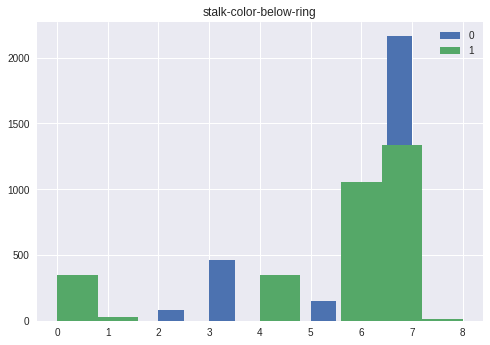

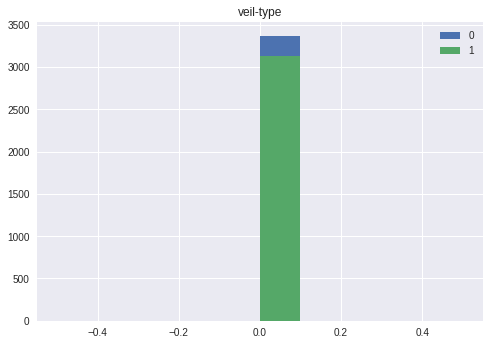

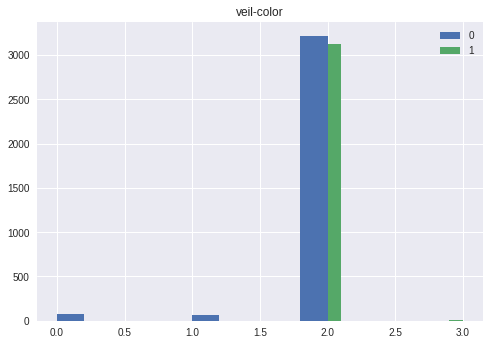

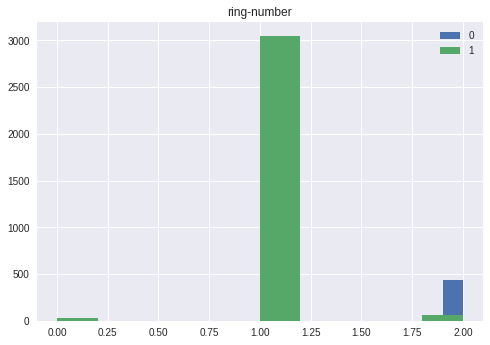

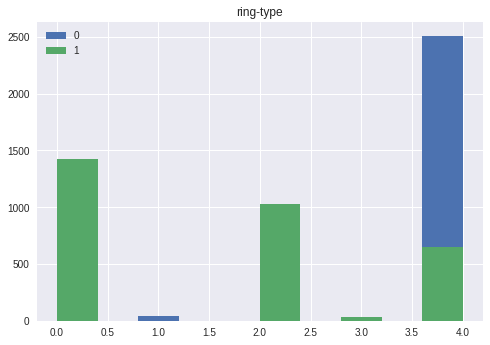

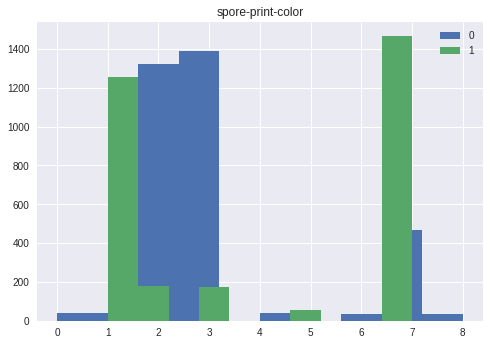

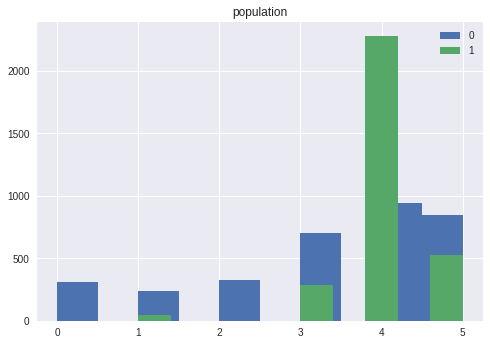

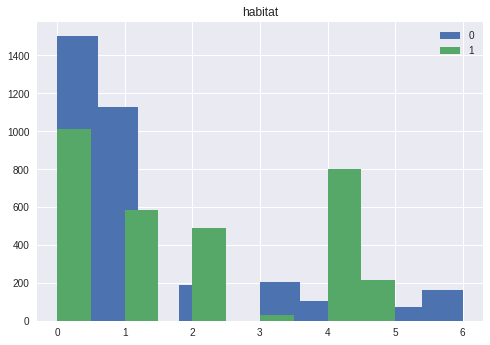

In [ ]:
df2 = X_train.copy()
df2['class'] = y_train
for col in X_train.columns:
  df2.groupby('class')[col].hist(legend=True)
  plt.title(col)
  plt.show()


In [ ]:
X_train['veil-type'].unique()

array([0])

veil-type has only 1 unique value, we can drop this column

In [ ]:
X_train = X_train.drop('veil-type', axis=1)
X_val = X_val.drop('veil-type', axis=1)

In [ ]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,...,2,1,6,7,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,...,1,2,7,7,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,...,2,2,6,7,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,...,2,2,3,6,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,...,1,2,6,7,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,...,2,2,7,2,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,...,2,3,7,7,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,...,2,2,6,6,2,1,0,7,4,4


Model building

In [ ]:
model = GradientBoostingClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Let's drop some rows and see if the model will be as good 

In [ ]:
len(X_train)

6499

In [ ]:
X_train2 = X_train[0:1000]
y_train2 = y_train[0:1000]
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_val)
print(classification_report(y_val, y_pred2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
X_train2 = X_train[0:300]
y_train2 = y_train[0:300]
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_val)
print(classification_report(y_val, y_pred2))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       843
           1       0.97      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



300 rows is not enough for max recall

We can change hyperparameters and see if there will be any difference

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model2 = GradientBoostingClassifier()
parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : sp_randInt(4, 10)
                 }

In [ ]:
randm = RandomizedSearchCV(estimator=model2, param_distributions = parameters,
                            cv = 4, n_iter = 10, n_jobs=-1)

randm.fit(X_train[0:300], y_train[0:300])

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

In [ ]:
y_pred2 = randm.predict(X_val)
print(classification_report(y_val, y_pred2))

Hyperparameter tuning impoved the model even with lack of data

Let's take a look at one of the trees inside our classifier, just to see what's happenings inside this magic machine

In [ ]:
from sklearn.tree import export_graphviz


# Get the tree number 21
sub_tree_1 = model.estimators_[1, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_1,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False,
    feature_names=X_train.columns # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())